## Integration

#### scipy.integrate documentation at https://docs.scipy.org/doc/scipy/tutorial/integrate.html

In [1]:
import  numpy as np
import scipy as sp
import scipy.integrate as integrate
from matplotlib import pyplot as plt

### Exercise 5.4. 

Diffraction pattern $I(r) = \left( \frac{J_1(kr)}{kr} \right )^2$. By definition $J_m(x) = \frac{1}{\pi} \int_0^\pi cos(m\Theta - x sin \Theta) d\Theta$.

a) Write a python function that calculates $J_m(x)$ . Use it to make a plot of $J_0$, $J_1$, $J_2$ in the x-interval [0,20]

b) Make a density plot of the intensity of the diffraction pattern, for a point light source with $\lambda = 500$ nm in a square region of the focal plane with r in the range [0,1] $\mu$m

In [2]:
# Define integrand
def integrand(theta,x,m):
    integrand = (1.0/np.pi)*np.cos(m*theta - x*np.sin(theta))
    return integrand

In [3]:
# Calculate Bessel using general purpose integration routine from python
# https://docs.scipy.org/doc/scipy/tutorial/integrate.html
def bessel(func,x,m):
    bes = integrate.quad(func,0.0,np.pi,args=(x,m))
    return bes

In [4]:
# Calculate Bessel using Romberg
def bessel_rom(func,x,m):
    bes = integrate.romberg(func,0.0,np.pi,args=(x,m))
    return bes

In [5]:
# Calculate Bessel using trapezoidal rule
def bessel_trap(x,m,N):
    dtheta = np.pi/float(N)
    grid = np.arange(0.0,np.pi,dtheta)
    y = integrand(grid,x,m)
    bes = integrate.trapezoid(y,grid)

    return bes

In [6]:
# Calculate Bessel using Simpson rule
def bessel_simp(x,m,N):
    dtheta = np.pi/float(N)
    grid = np.arange(0.0,np.pi,dtheta)
    y = integrand(grid,x,m)
    bes = integrate.simpson(y,grid)

    return bes

In [8]:
# Just a quick check that different methods 
# give consistent answers in a given x, for given m
bes1 = bessel_simp(3,2,10000)
bes2 = bessel_rom(integrand,3,2)
print(bes1,bes2)

0.4859912606163224 0.4860912605858965


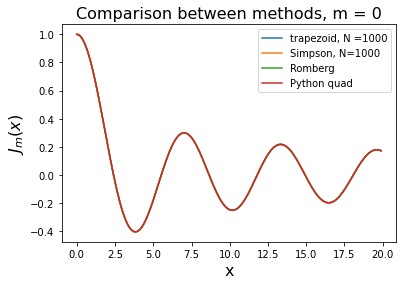

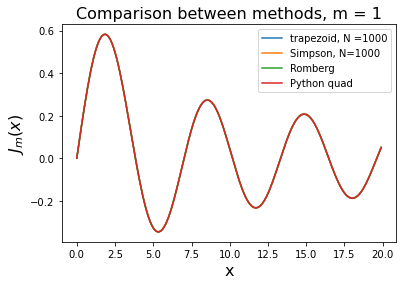

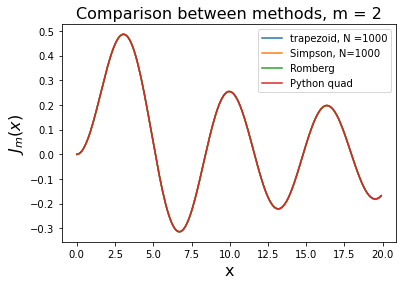

In [10]:
xlist = np.arange(0,20,0.1)
N = 1000

for m in range(3):
    
    bes = [ ]
    bes_rom = [ ]
    bes_trap = [ ]
    bes_simp = [ ]
    
    for x in xlist:
        b1 = (bessel(integrand,x,m))
        bes.append(b1[0])
        bes_rom.append(bessel_rom(integrand,x,m))
        bes_trap.append(bessel_trap(x,m,N))
        bes_simp.append(bessel_simp(x,m,N))
  
    plt.plot(xlist,bes_trap,label='trapezoid, N =' + str(N))
    plt.plot(xlist,bes_simp,label='Simpson, N=' + str(N))
    plt.plot(xlist,bes_rom,label='Romberg')
    plt.plot(xlist,bes,label='Python quad')
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$J_m(x)$', fontsize=16)
    plt.legend()
    plt.title('Comparison between methods, m = ' + str(m),fontsize = 16)
    plt.show()

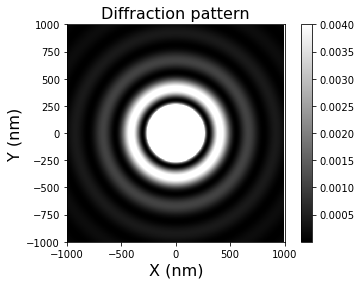

In [11]:
# EXERCISE 5.4 FROM COMPUTATIONAL PHYSICS.
# CALCULATE AND PLOT THE DIFFRACTION PATTERN
############################################

import  numpy as np
import scipy as sp
import scipy.integrate as integrate
from matplotlib import pyplot as plt


# Calculate Bessel function using Simpson rule
def bessel_simp(x,m,N):
    
    # Define integrand
    def integrand(theta,x,m):
        integrand = (1.0/np.pi)*np.cos(m*theta - x*np.sin(theta))
        return integrand
    
    # Evaluate in a grid
    dtheta = np.pi/float(N)
    grid = np.arange(0.0,np.pi,dtheta)
    y = integrand(grid,x,m)
    #Integrate
    bes = integrate.simpson(y,grid)

    return bes


# Use Bessel evaluation above to compute the 
# intensity of the diffraction pattern as 
# a function of the coordinates (x,y) in the 
# focal plane of the telescope
def diffraction(x,y,N):
    
    twopi = 2*np.pi
    # Light wavelength (could be passed as input)
    wavelength = 500 # nm units
    # Frequency
    k = twopi/wavelength
    # Distance from center of the point (x,y)
    r = np.sqrt(x**2 + y**2)
    kr = k*r
    # Bessel J_1, m=1
    m = 1
    
    if (kr < 1e-20):
        # Limit of (J_1(kr)/kr)^2, when kr -> 0
        intensity = 1./4.
    else:
        # intensity = (J_1(kr)/kr)^2
        J1 = bessel_simp(kr,m,N)
        intensity = (J1/kr)**2
    
    return intensity


# Define grid of x,y coordinates in the focal plane
# in which we want to evaluate the intensity
xlist = np.arange(-1000,1000,5)
ylist = np.arange(-1000,1000,5)

# Number of points for Simpson integration scheme
N = 1000

# Compute diffraction intensity in all poins 
# of the (x,y) grid
z = [ ]
for x in xlist:
    for y in ylist:
        z.append(diffraction(x,y,N))

# Rearrange x,y in meshgrid for plotting
x = np.array(xlist)
y = np.array(ylist)
X, Y = np.meshgrid(x,y)
# Reshape z to adapt it to meshgrid
z = np.array(z)
Z = z.reshape(len(ylist),len(xlist))

# Produce intensity plot
fig1, ax = plt.subplots()
c = ax.pcolormesh(X,Y,Z,cmap='gray',vmax=0.004)
plt.colorbar(c)

# Axes limits
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)

# This is to show a square box (and not a rectangular one)
ax.set_box_aspect(1)

# Title and labels
ax.set_title('Diffraction pattern',fontsize = 16)
ax.set_xlabel('X (nm)',fontsize=16)
ax.set_ylabel('Y (nm)',fontsize=16)

plt.show()

### Exercise, implement the trapezoidal rule: 
Write your own function for trapezoidal integration. The function should double the number of points in the sampled interval until a specifified level of accuracy is reached

In [ ]:
def trap(func,a,b,tol):
        
    demomode = False
        
    # Initial number of sampled points
    N = 10
    
    # 1/2*f(a) + 1/2*f(b)
    s = 0.5*func(a) + 0.5*func(b)
    
    # Starting with N points
    h = (b-a)/N
    s1 = 0.
    for k in range(1,N):
        s1 += func(a + k*h)
    # Trapezoidal rule with N points in [a,b]
    trap1N = h*(s + s1)
    
    acc = tol+1.
    
    if demomode:
        print(N,trap1N)
    
    while (acc > tol):
        # Now doubling the number of points and updating h
        N = 2*N
        h = (b-a)/N
        # Computing \sum f(x), only in the new sampled points 
        s2 = 0.
        for k in range(1,N,2):
            s2 += func(a + k*h)
        # Trapezoidal rule with 2N points
        trap2N = h*(s + s1 + s2)
        
        acc = ((1./3.)*abs(trap2N-trap1N))/abs(trap2N)

        if demomode:
            print(N, trap2N)
               
        # Update and loop
        s1, trap1N = s1 + s2, trap2N
        
        # Exit loop if N > 1e6
        if (N > 1e6):
            print(' ')
            print('The required accuracy could not be reached with N=1e6 points.')
            print('Stopping here, N =', N, '; acc =', acc)
            break
    
    return trap2N

### Exercise, implement the Simpson's rule: 
Write your own function for Simpson's integration. The function should double the number of points in the sampled interval until a specifified level of accuracy is reached

In [ ]:
def simp(func,a,b,tol):
    
    demomode = False
        
    # Initial number of sampled points
    N = 10
    
    # 1/3*f(a) + 1/3*f(b)
    s = (1./3.)*func(a) + (1./3.)*func(b)
    
    # Starting with N points
    h = (b-a)/N
    s1odd = 0.
    for k in range(1,N,2):
        s1odd += func(a + k*h)
    s1even = 0.
    for k in range(2,N,2):
        s1even += func(a+k*h)
    
    # Simpson's rule with N points in [a,b]
    simp1N = h*(s + (4./3.)*s1odd + (2./3.)*s1even)
    
    if demomode:
            print(N, simp1N)
    
    acc = tol+1.
    
    while (acc > tol):
        # Now doubling the number of points and updating h
        N = 2*N
        h = (b-a)/N
        # All points in previous interval (odd+even) are
        # now the even points in the new interval.
        s2even = s1odd + s1even
        # Now getting s2odd
        s2odd = 0.
        for k in range(1,N,2):
            s2odd += func(a+k*h)
        # Simpson's rule with 2N points in the sample
        simp2N = h*(s + (4./3.)*s2odd + (2./3.)*s2even)
    
        acc = ((1./15.)*abs(simp2N-simp1N))/abs(simp2N)
        
        # Update and loop
        s1even, s1odd = s2even, s2odd
        simp1N = simp2N
        
        if demomode:
            print(N, simp2N)
        
        # Exit loop if N > 1e6
        if (N > 1e6):
            print(' ')
            print('The required accuracy could not be reached with N=1e6 points.')
            print('Stopping here, N =', N, '; acc =', acc)
            break
    
    return simp2N

### Exercise from slides: integration of NFW profile

In [ ]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
from matplotlib import pyplot as plt

# Parameters
rho0 = 1e8  # Solar masses kpc^-3
rs = 10.0   # kpc
rmax = 100.*rs

# Function that computes NFW profile as a function of r
def NFW(r):
       
    x = r/rs   
    rho = rho0/(x*(1.+ x)**2)
    
    return rho

# Function to integrate
def integrand(r):
    
    fourpi = 4.0*np.pi
    
    # For r=0, integrand=0, otherwise call NFW(r)
    if (r < 1e-30):
        integrand = 0.
    else:
        rho = NFW(r)
        integrand = fourpi*r**2*rho
        
    return integrand

# Romberg integration to get mass, using parameters at the beginning of the box
#M = integrate.romberg(integrand,0.0,rmax)
#print(' ')

# Same integral, using my own trapezoidal rule function
#tol = 1e-4
#M = trap(integrand,0.0,rmax,tol)
#print('Trapezoidal rule \n')

# Same integral, using my own trapezoidal rule function
tol = 1e-4
M = simp(integrand,0.0,rmax,tol)
print('Simpsons rule \n')

print("The answer is:")
print("M =", "{:.2E}".format(M), "Msun")
print(' ')

### Exercise: 
Do again exercise 5.4 (bessel function) using your own Simpson's rule integration function

In [ ]:
import  numpy as np
import scipy as sp
import scipy.integrate as integrate
from matplotlib import pyplot as plt

# Define integrand
def integrand(theta,x,m):
    integrand = (1.0/np.pi)*np.cos(m*theta - x*np.sin(theta))
    return integrand

def bessel(x,m):
    integ = lambda theta: integrand(theta,x,m)
    tol = 1e-4
    bes = simp(integ, 0., np.pi,tol)
    return bes

# Calculate Bessel using Simpson rule from scipy
N = 100
def bessel_simp(x,m,N):
    dtheta = np.pi/float(N)
    grid = np.arange(0.0,np.pi,dtheta)
    y = integrand(grid,x,m)
    bes = integrate.simpson(y,grid)

    return bes

x = 3
m = 2
bes = bessel(x,m)
bes2 = bessel_simp(x,m,N)
print(bes)


xlist = np.arange(0,20,0.1)
for m in range(3):
    
    bes = [ ]
    bes2 = [ ]
    
    for x in xlist:
        b1 = bessel(x,m)
        b2 = bessel_simp(x,m,N)
        bes.append(b1)
        bes2.append(b2)
        
    plt.plot(xlist,bes,label='Simpson, my function')
    plt.plot(xlist,bes2,label='Simpson, scipy')
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$J_m(x)$', fontsize=16)
    plt.legend()
    plt.title('Bessel function, m = ' + str(m),fontsize = 16)
    plt.show()